# Decision Tree Practice

In this notebook there is implementation of decision tree from scratch and other practice and experiments related to decision tree model

## DecisionTreeClassification

### Smoke Test

Create very simple data to test if DecisionTreeClassification works

In [1]:
import numpy as np

from mlpeople.models.tree import DecisionTreeClassification

# Features: [age, salary]
X_smoke = np.array([
    [25, 50000],
    [30, 60000],
    [45, 80000],
    [35, 65000],
    [22, 48000],
    [50, 90000]
])

# Binary labels
y_smoke = np.array([0, 0, 1, 0, 0, 1])

# Train
model_smoke = DecisionTreeClassification(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini"
)

model_smoke.fit(X_smoke, y_smoke)

# Predict
preds = model_smoke.predict(X_smoke)
print("Predictions:", preds)

# Accuracy
accuracy = np.mean(preds == y_smoke)
print("Accuracy:", accuracy)

# Optional pruning
model_smoke.prune(alpha=0.01)


Predictions: [0 0 1 0 0 1]
Accuracy: 1.0


### Binary Classification data

Generate a binary classification dataset and test the DecisionTreeClassification implementation on more realistic data using train and test splits.

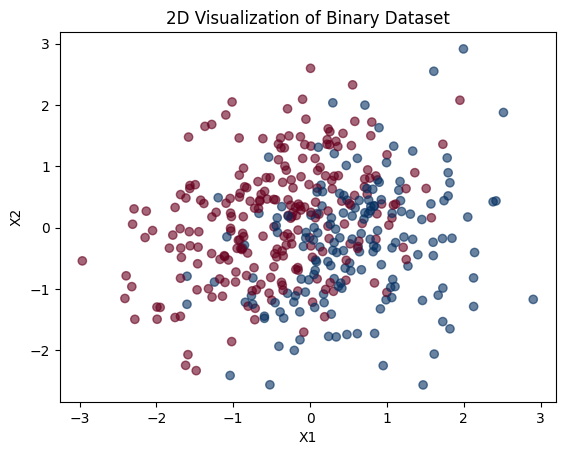

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from mlpeople.models.logistic import generate_logistic_regression_data

X_bin, y_bin, _ = generate_logistic_regression_data(
    n=400,
    p=2,
    intercept=-0.5,
    coefs=[2, -1],
    seed=42,
    sigma=2,
)

plt.scatter(
    X_bin[:, 0],
    X_bin[:, 1],
    c=y_bin,
    alpha=0.6,
    cmap="RdBu"
)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("2D Visualization of Binary Dataset")

plt.show()

In [3]:

from sklearn.model_selection import train_test_split

X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

# Train
model_binary = DecisionTreeClassification(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini"
)

model_binary.fit(X_bin_train, y_bin_train)

def print_acc(model, X_train, X_test, y_train, y_test):
    # Predict train
    preds_train = model.predict(X_train)

    # Predict test
    preds_test = model.predict(X_test)

    # Accuracy train
    accuracy_train = np.mean(preds_train == y_train)
    print("Accuracy Train:", accuracy_train)

    # Accuracy test
    accuracy_test = np.mean(preds_test == y_test)
    print("Accuracy Test:", accuracy_test)

print_acc(model_binary, X_bin_train, X_bin_test, y_bin_train, y_bin_test)

Accuracy Train: 0.871875
Accuracy Test: 0.6875


#### Compare result with sklearn DecisionTreeClassifier

In [4]:
from sklearn.tree import DecisionTreeClassifier as DecisionTreeClassifier_skl

model_binary_skl = DecisionTreeClassifier_skl(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini",
    random_state=42
)
model_binary_skl.fit(X_bin_train, y_bin_train)

print_acc(model_binary_skl, X_bin_train, X_bin_test, y_bin_train, y_bin_test)

Accuracy Train: 0.871875
Accuracy Test: 0.6875


### Visualizations

In [5]:
from mlpeople.models.tree.utils import print_tree, pretty_print, decision_path
from mlpeople.models.tree.visualization import plot_tree_matplotlib

#### Smoke

Node: X[0] <= 40.0000 (samples=6)
  Leaf: class=0 (samples=4)
  Leaf: class=1 (samples=2)

Pretty version:
├── X[0] <= 40.0000
│   └── Leaf (class=0, samples=4)
    └── Leaf (class=1, samples=2)

Decision path:
X[0] <= 40.0000 → go LEFT
Predict class 0


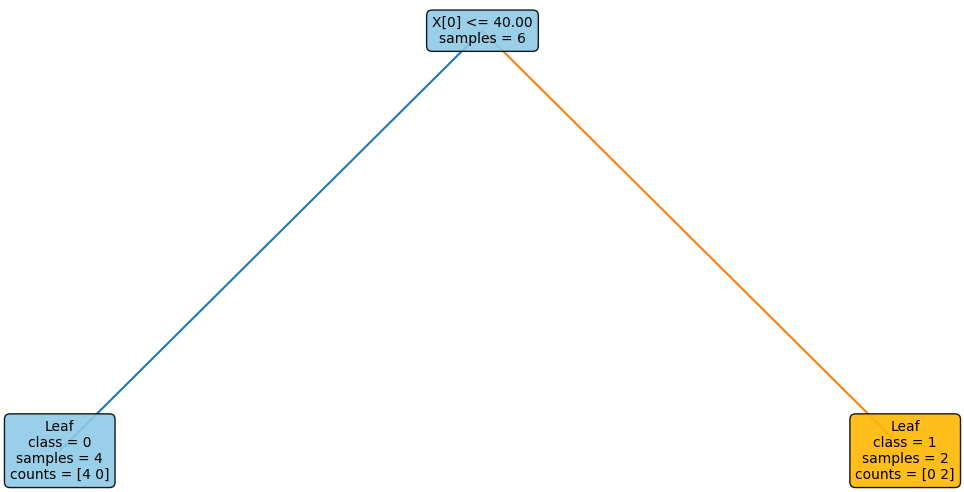

In [6]:
# Print tree
print_tree(model_smoke.tree)

print("\nPretty version:")
pretty_print(model_smoke.tree)

# Decision path
sample = np.array([28, 52000])

print("\nDecision path:")
for step in decision_path(sample, model_smoke.tree):
    print(step)

plot_tree_matplotlib(model_smoke.tree)


#### Binary data model

In [7]:
print("\nPretty version:")
pretty_print(model_binary.tree)



Pretty version:
├── X[0] <= 0.0385
│   ├── X[1] <= -1.0709
│   │   ├── X[0] <= -0.6541
│   │   │   ├── X[1] <= -1.2671
│   │   │   │   ├── X[1] <= -2.3732
│   │   │   │   │   └── Leaf (class=1, samples=1)
│   │   │   │       └── Leaf (class=0, samples=10)
│   │   │       ├── X[0] <= -0.9917
│   │   │       │   └── Leaf (class=0, samples=4)
│   │   │           └── Leaf (class=1, samples=2)
│   │       ├── X[0] <= -0.1063
│   │       │   ├── X[0] <= -0.4771
│   │       │   │   └── Leaf (class=1, samples=3)
│   │       │       └── Leaf (class=1, samples=10)
│   │           └── Leaf (class=0, samples=2)
│       ├── X[0] <= -0.1157
│       │   ├── X[1] <= 0.3625
│       │   │   ├── X[1] <= 0.3351
│       │   │   │   └── Leaf (class=0, samples=79)
│       │   │       └── Leaf (class=1, samples=1)
│       │       └── Leaf (class=0, samples=41)
│           ├── X[1] <= 0.2258
│           │   ├── X[0] <= -0.0110
│           │   │   └── Leaf (class=1, samples=5)
│           │       └── Leaf (cla

In [8]:
# Decision path
sample = X_bin_train[7]

print("\nDecision path:")
for step in decision_path(sample, model_binary.tree):
    print(step)




Decision path:
X[0] > 0.0385 → go RIGHT
X[1] <= 0.7591 → go LEFT
X[1] <= -0.5444 → go LEFT
X[0] > 0.2655 → go RIGHT
X[0] > 0.4915 → go RIGHT
Predict class 1


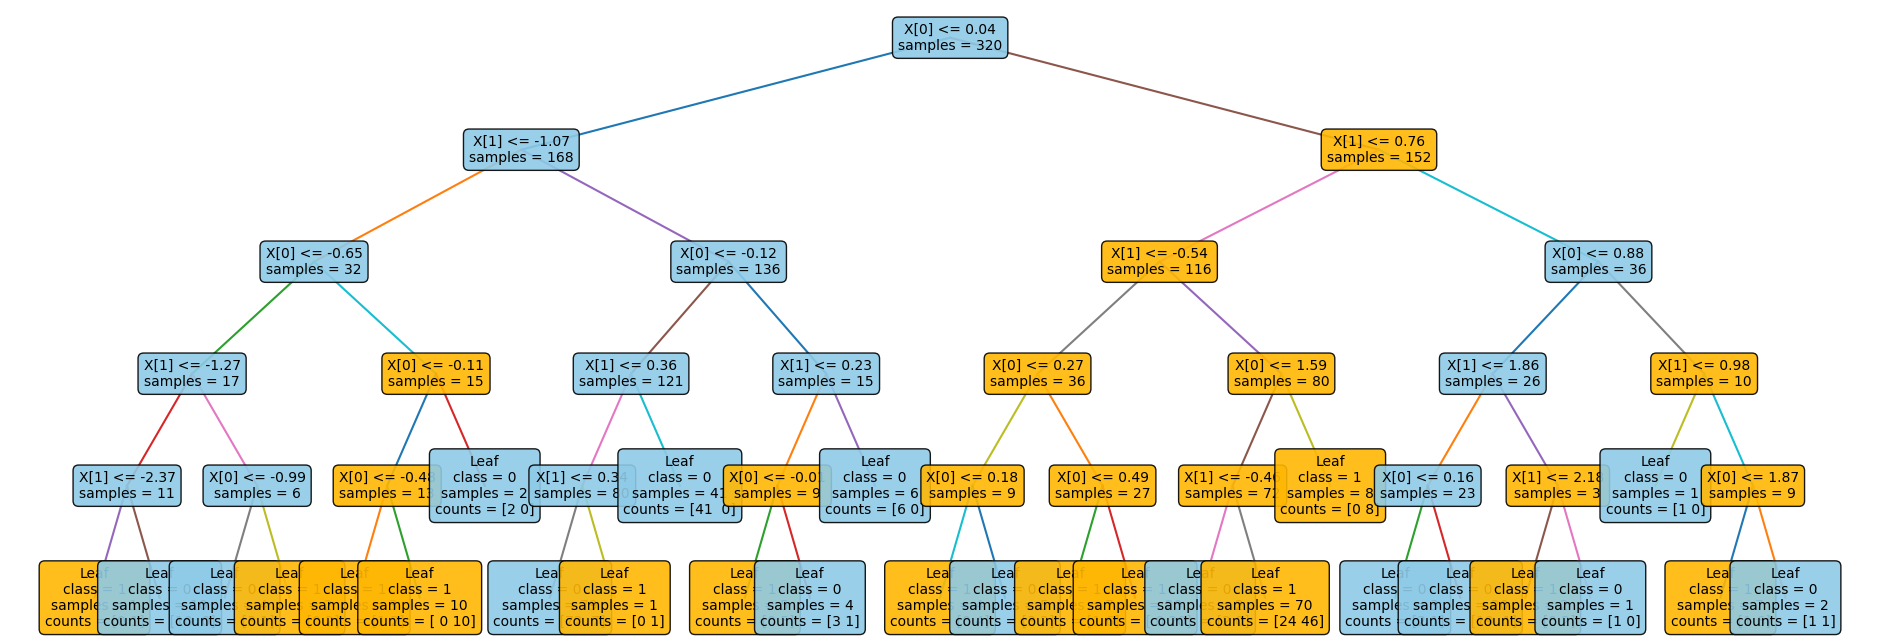

In [9]:
plot_tree_matplotlib(model_binary.tree, figsize=(24, 8))

### Pruning Experiment

Practice and experiment with prune method implemented in DecisionTreeClassification

Accuracy Train: 0.975
Accuracy Test: 0.6625


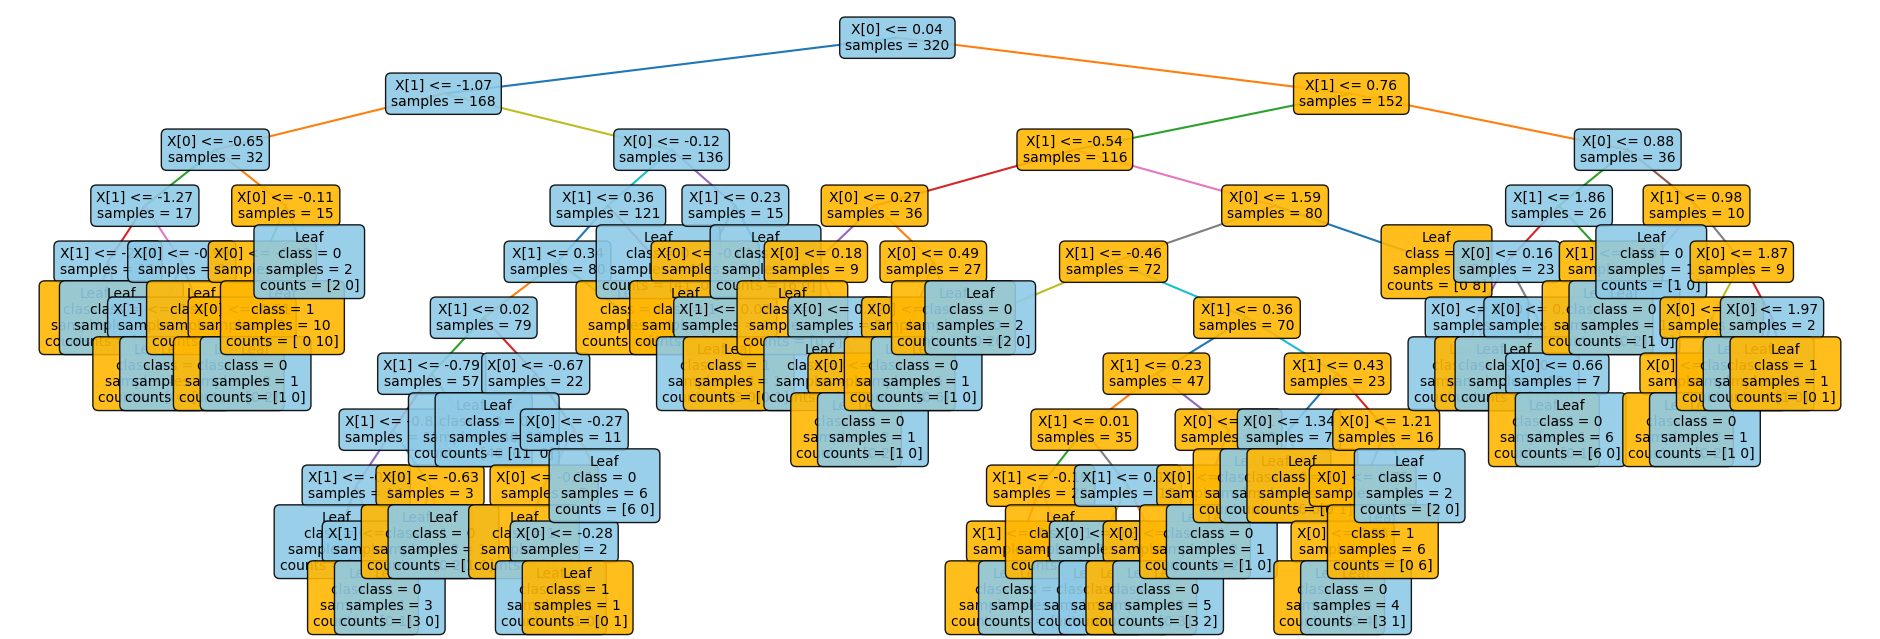

In [10]:
model_binary_prune = DecisionTreeClassification(
    max_depth=10, # basically no limit for this amount of data
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini"
)

model_binary_prune.fit(X_bin_train, y_bin_train)

# show full tree (overfit) result
print_acc(model_binary_prune, X_bin_train, X_bin_test, y_bin_train, y_bin_test)
plot_tree_matplotlib(model_binary_prune.tree, figsize=(24, 8))

Accuracy Train: 0.965625
Accuracy Test: 0.6625


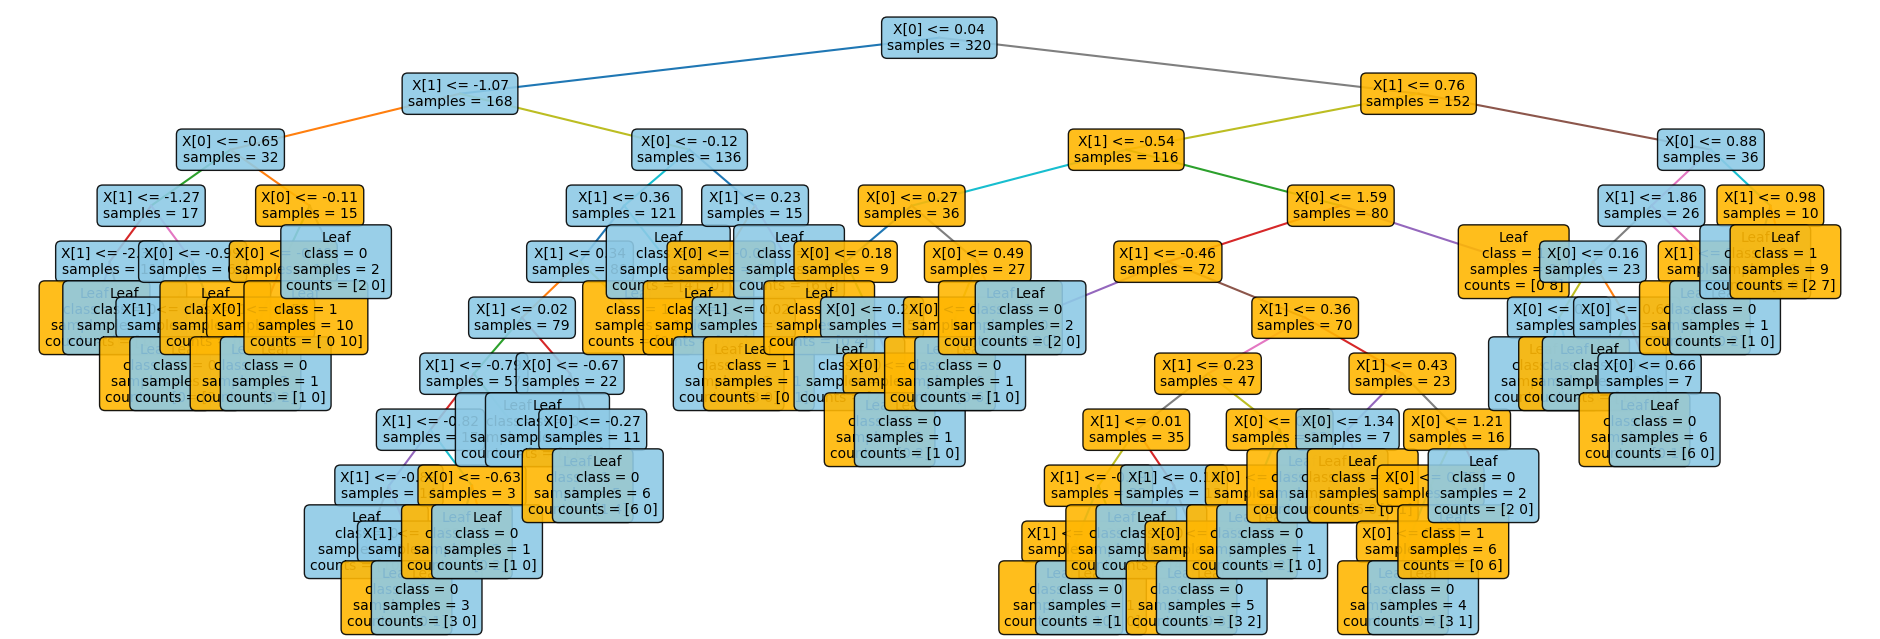

In [11]:
# prune alpha=0.9 result
model_binary_prune.prune(alpha=0.9)
print_acc(model_binary_prune, X_bin_train, X_bin_test, y_bin_train, y_bin_test)
plot_tree_matplotlib(model_binary_prune.tree, figsize=(24, 8))

Accuracy Train: 0.94375
Accuracy Test: 0.7


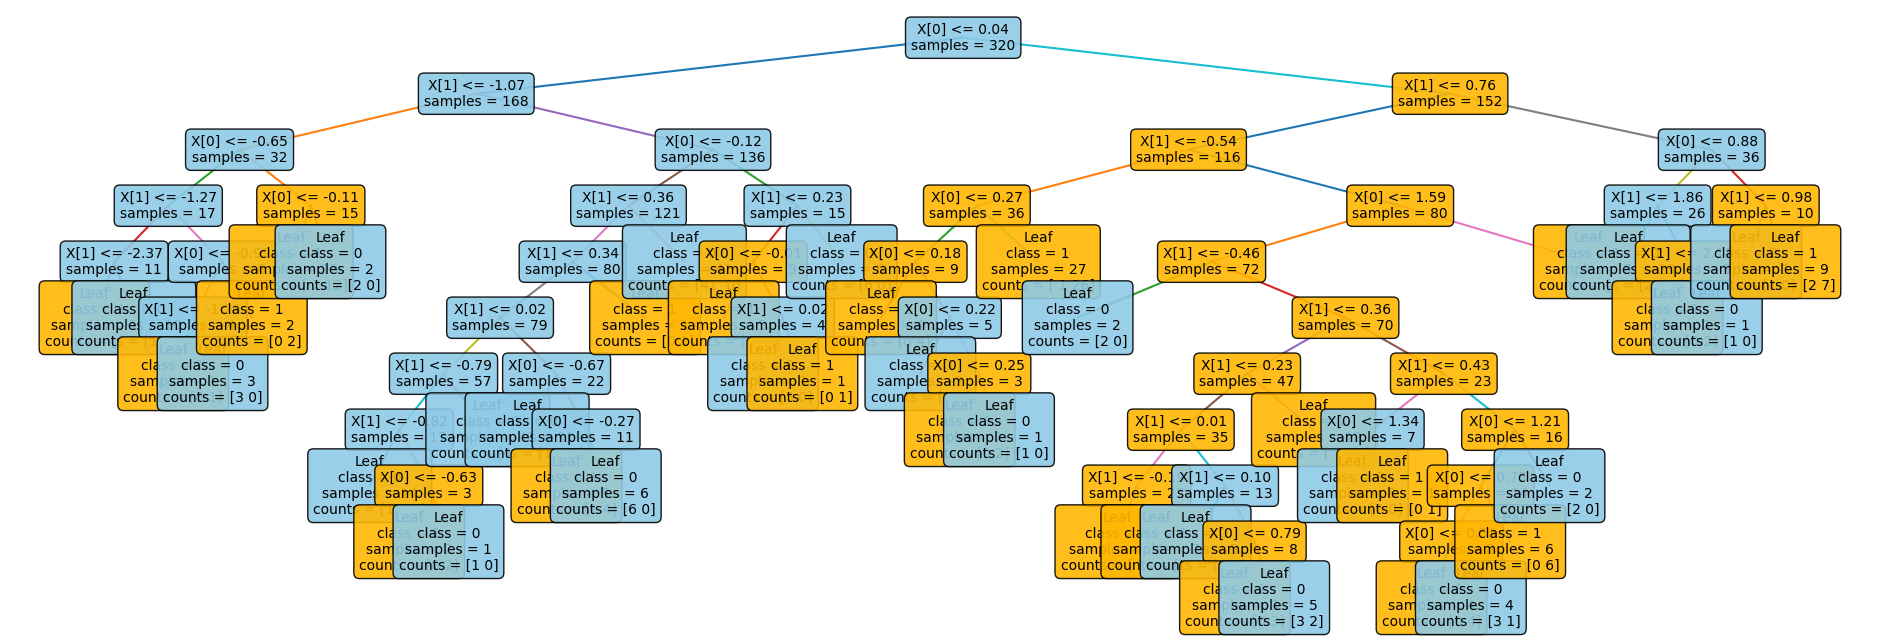

In [12]:
# prune alpha=1 result
model_binary_prune.prune(alpha=1)
print_acc(model_binary_prune, X_bin_train, X_bin_test, y_bin_train, y_bin_test)
plot_tree_matplotlib(model_binary_prune.tree, figsize=(24, 8))

Accuracy Train: 0.896875
Accuracy Test: 0.725


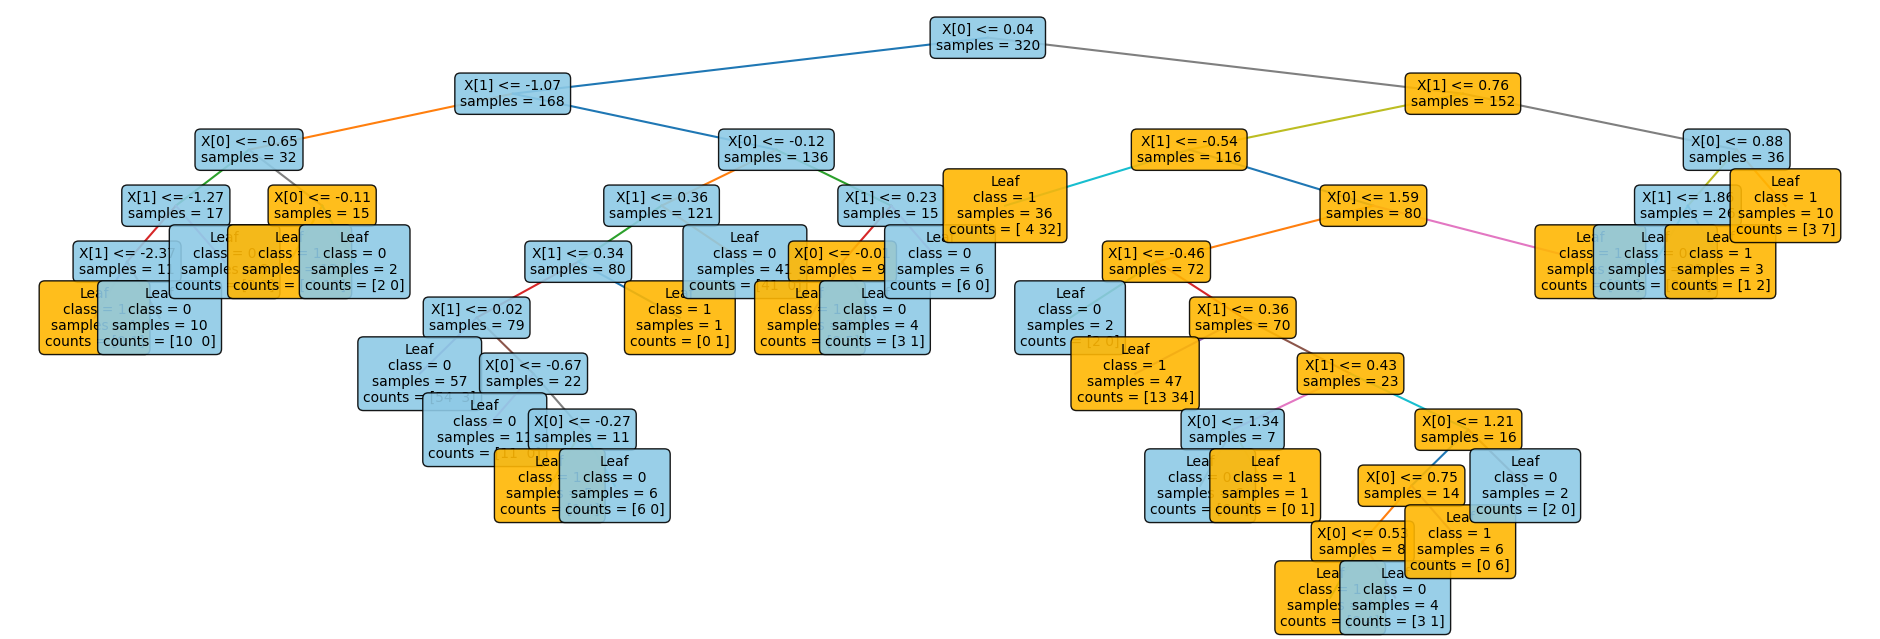

In [13]:
# prune alpha=1.5 result
model_binary_prune.prune(alpha=1.5)
print_acc(model_binary_prune, X_bin_train, X_bin_test, y_bin_train, y_bin_test)
plot_tree_matplotlib(model_binary_prune.tree, figsize=(24, 8))

Accuracy Train: 0.840625
Accuracy Test: 0.75


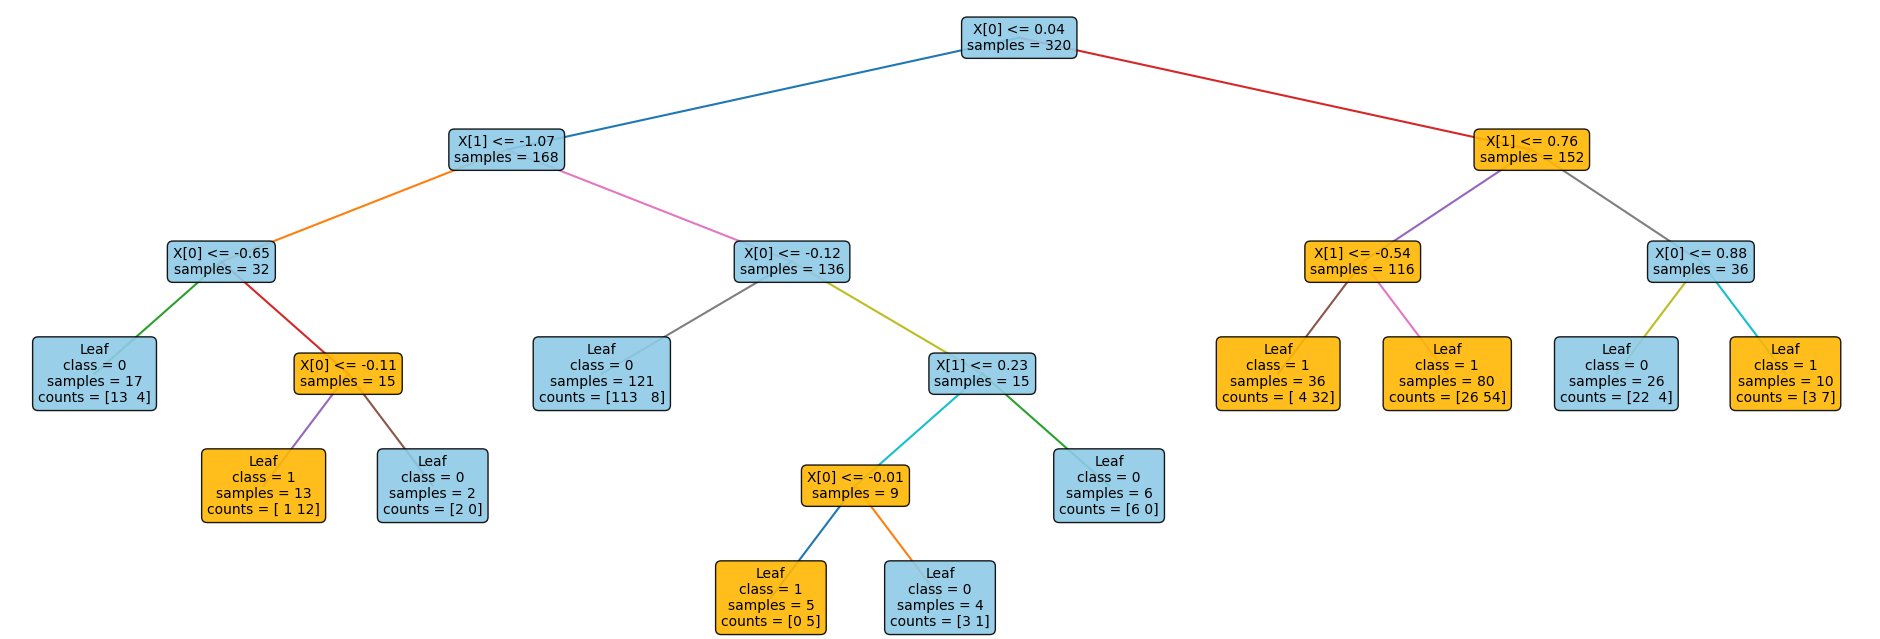

In [14]:
# prune alpha=2 result
model_binary_prune.prune(alpha=2)
print_acc(model_binary_prune, X_bin_train, X_bin_test, y_bin_train, y_bin_test)
plot_tree_matplotlib(model_binary_prune.tree, figsize=(24, 8))

Accuracy Train: 0.81875
Accuracy Test: 0.7375


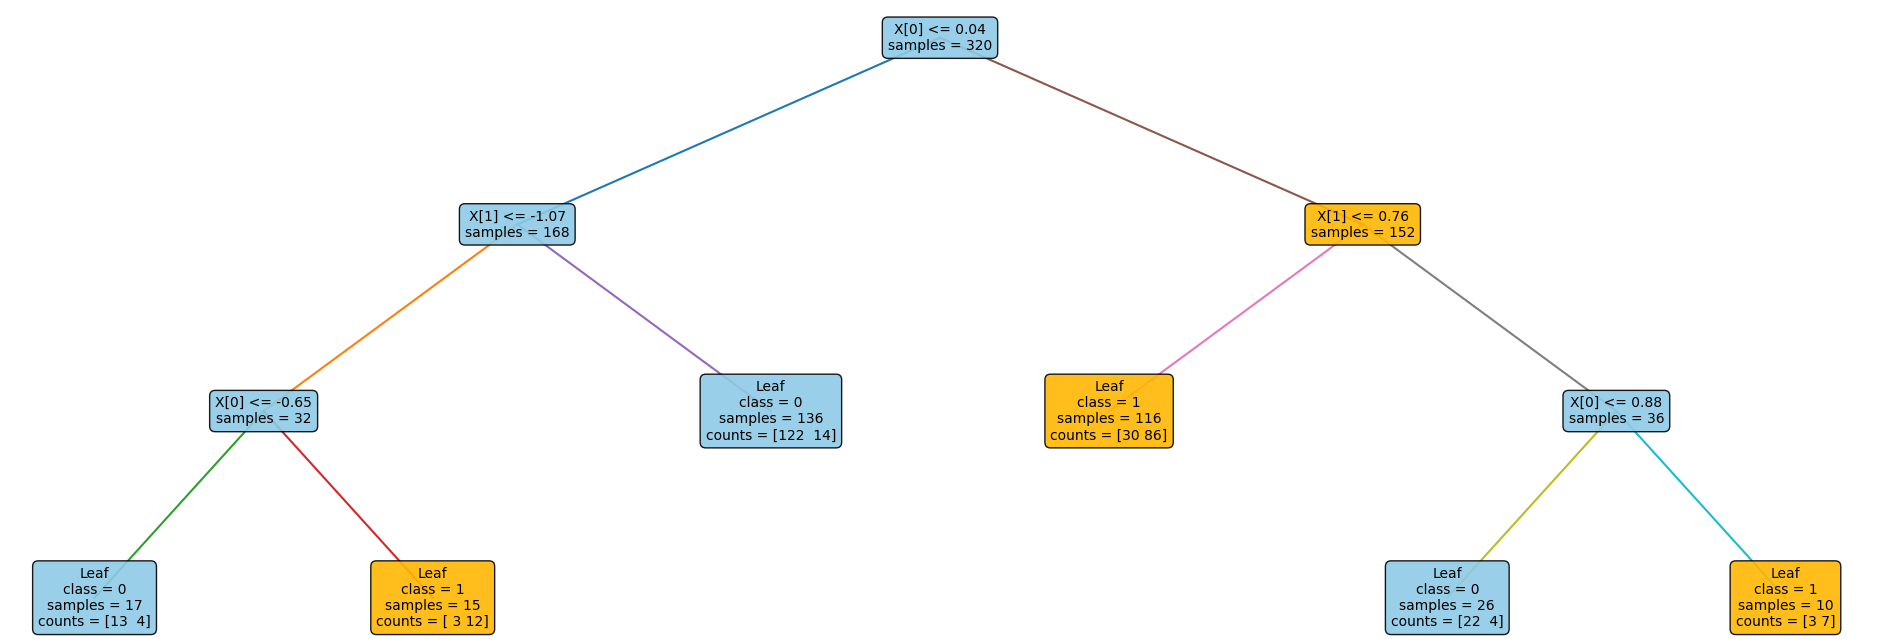

In [15]:
# prune alpha=4 result
model_binary_prune.prune(alpha=4)
print_acc(model_binary_prune, X_bin_train, X_bin_test, y_bin_train, y_bin_test)
plot_tree_matplotlib(model_binary_prune.tree, figsize=(24, 8))

### Multiclass data

create 2 features 4 classes data and experiment with that

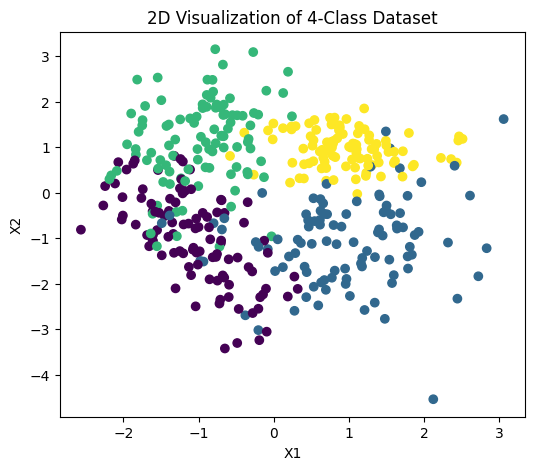

In [16]:
from mlpeople.visualization.classification.single_label import generate_2D_classification_data

X_mult4, y_mult4 = generate_2D_classification_data(n_samples=400, n_classes=4)

In [17]:
from sklearn.model_selection import train_test_split

X_mult4_train, X_mult4_test, y_mult4_train, y_mult4_test = train_test_split(X_mult4, y_mult4, test_size=0.2, random_state=42)

model_mult4 = DecisionTreeClassification(
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini"
)

model_mult4.fit(X_mult4_train, y_mult4_train)

print_acc(model_mult4, X_mult4_train, X_mult4_test, y_mult4_train, y_mult4_test)

Accuracy Train: 0.946875
Accuracy Test: 0.8875


#### Compare result with sklearn DecisionTreeClassifier

In [18]:
model_mult4_skl = DecisionTreeClassifier_skl(
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini",
    random_state=42
)
model_mult4_skl.fit(X_mult4_train, y_mult4_train)

print_acc(model_mult4_skl, X_mult4_train, X_mult4_test, y_mult4_train, y_mult4_test)

Accuracy Train: 0.946875
Accuracy Test: 0.8875


#### Visualization

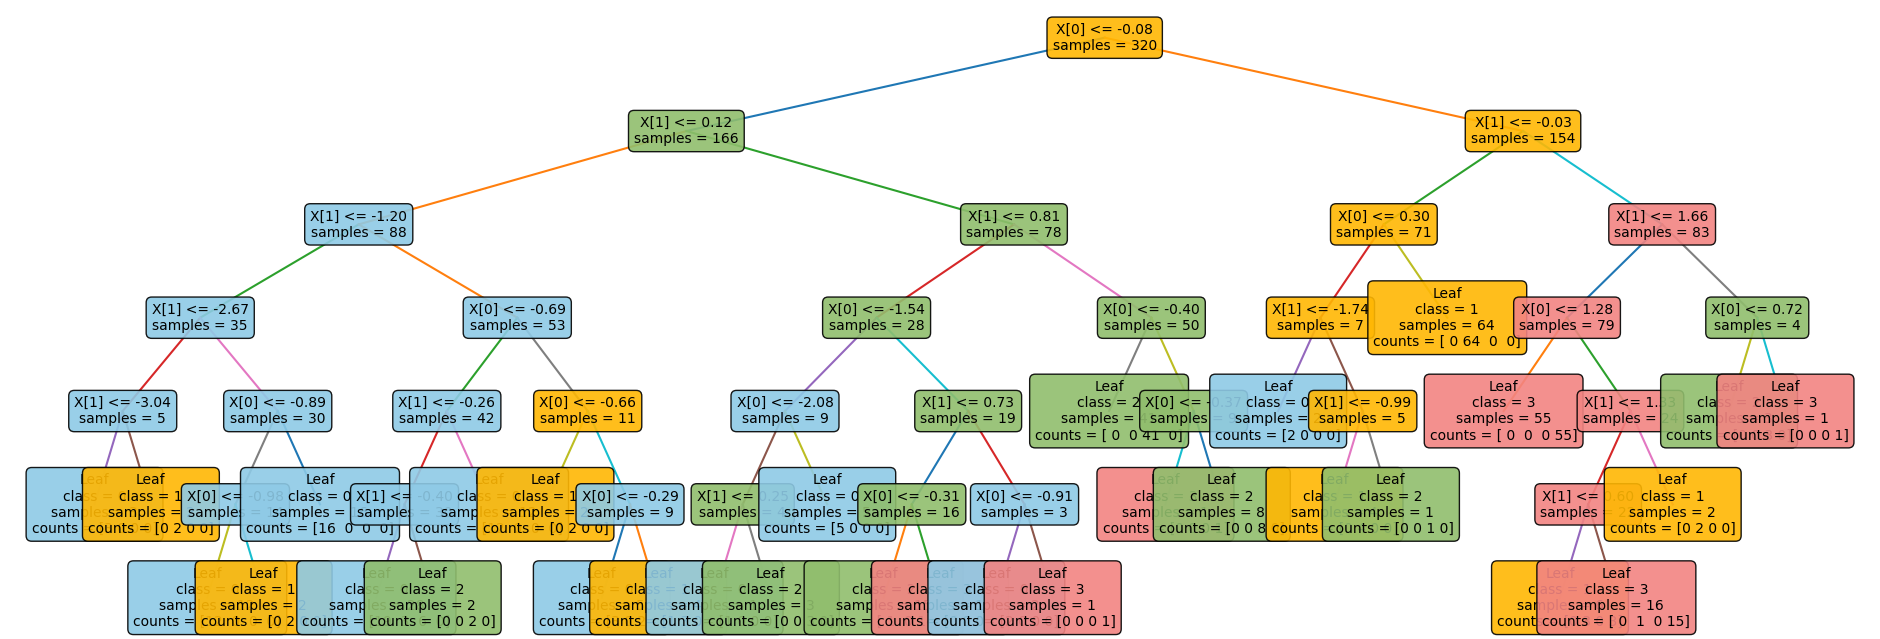

In [19]:
plot_tree_matplotlib(model_mult4.tree, figsize=(24,8))

#### Pruning

Accuracy Train: 0.9
Accuracy Test: 0.9


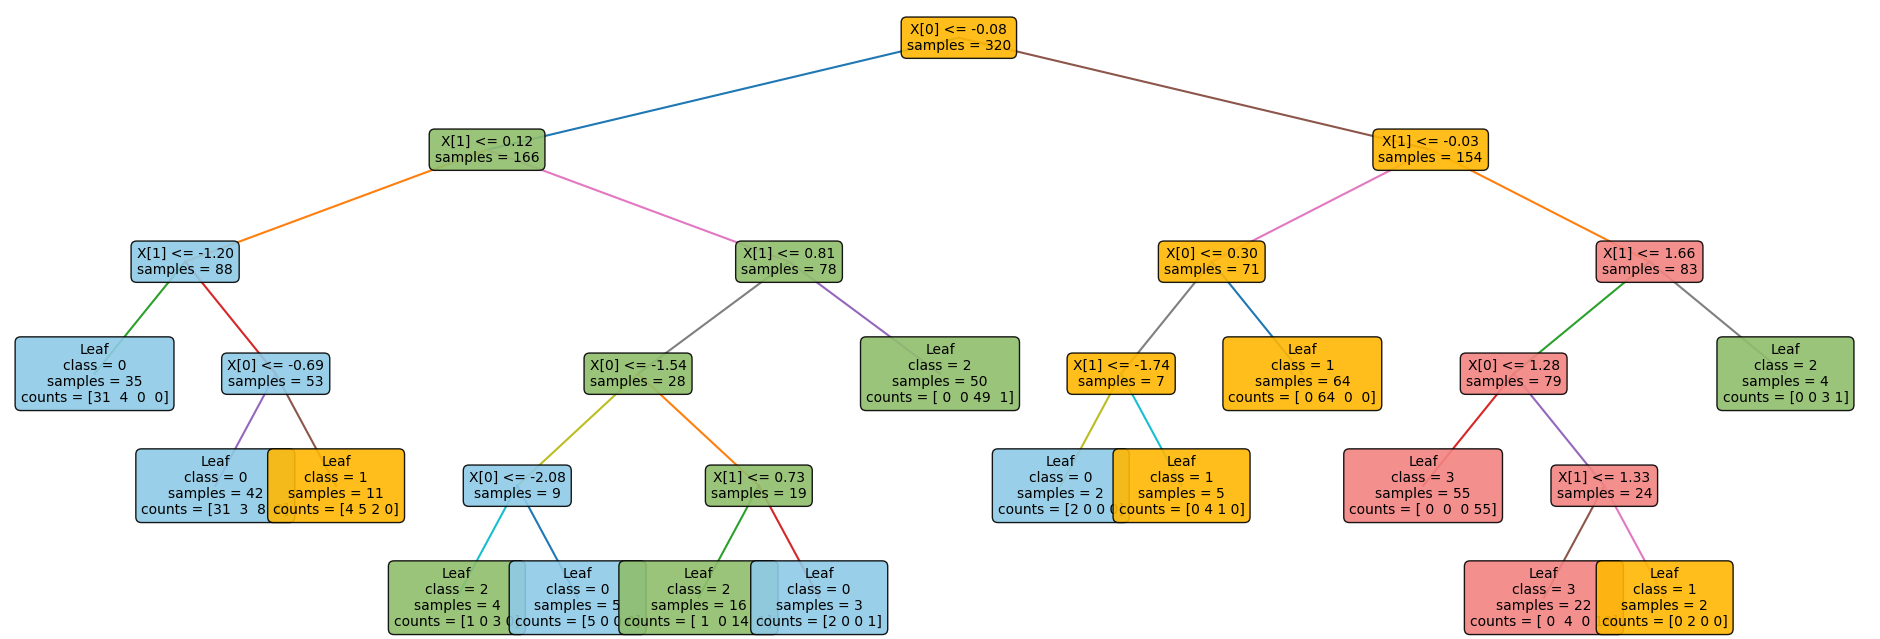

In [20]:
model_mult4.prune(alpha=2)
print_acc(model_mult4, X_mult4_train, X_mult4_test, y_mult4_train, y_mult4_test)
plot_tree_matplotlib(model_mult4.tree, figsize=(24,8))

## DecisionTreeRegression

In [21]:
from mlpeople.models.tree import DecisionTreeRegression

### Smoke test - Simple 1D Regression (Non-linear Function)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Generate X
X_reg1 = np.linspace(0, 10, 120)
X_reg1 = X_reg1.reshape(-1, 1)

# Non-linear target with noise
y_reg1 = (
    0.5 * X_reg1[:, 0] ** 2
    - 3 * X_reg1[:, 0]
    + 5
    + np.random.normal(0, 3, size=len(X_reg1))
)

# Split
split = int(0.8 * len(X_reg1))
X_reg1_train, X_reg1_test = X_reg1[:split], X_reg1[split:]
y_reg1_train, y_reg1_test = y_reg1[:split], y_reg1[split:]


In [23]:
model_reg1 = DecisionTreeRegression(
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=3
)

model_reg1.fit(X_reg1_train, y_reg1_train)

preds_train = model_reg1.predict(X_reg1_train)
preds_test = model_reg1.predict(X_reg1_test)


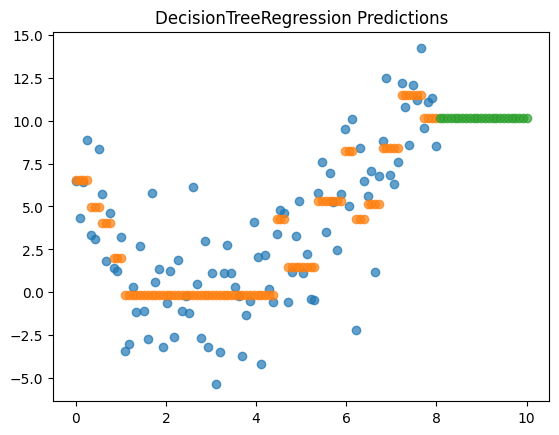

In [24]:
plt.scatter(X_reg1_train, y_reg1_train, alpha=0.7)
plt.scatter(X_reg1_train, preds_train, alpha=0.7)
plt.scatter(X_reg1_test, preds_test, alpha=0.7)
plt.title("DecisionTreeRegression Predictions")
plt.show()


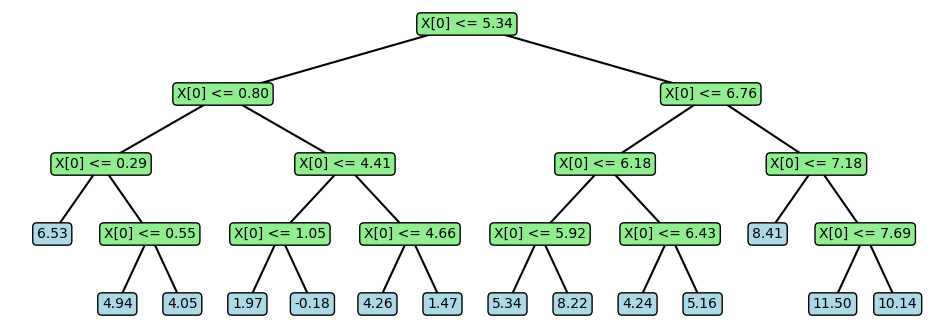

In [25]:
from mlpeople.models.tree.visualization import plot_reg_tree_matplotlib

plot_reg_tree_matplotlib(model_reg1.tree, figsize=(12,4))

### 2D Regression (More Realistic)

In [26]:
from mlpeople.models.linear import (
    generate_linear_regression_data,
    fit_ols,
    predict,
    rmse,
)

# Generate data
X_reg2, y_reg2, _ = generate_linear_regression_data(
    n=300, p=2, coefs=[2.0, -1.5], intercept=1.0, sigma=0.5, seed=42
)

X_reg2_train, X_reg2_test, y_reg2_train, y_reg2_test = train_test_split(X_reg2, y_reg2, test_size=0.2, random_state=42)

# Fit OLS to compare tree vs. linear regression
beta_hat = fit_ols(X_reg2_train, y_reg2_train, fit_intercept=True)

# predict train and test
y_lin_reg_pred_train = predict(X_reg2_train, beta_hat, fit_intercept=True)
y_lin_reg_pred_test = predict(X_reg2_test, beta_hat, fit_intercept=True)

print("OLS RMSE Train:", rmse(y_reg2_train, y_lin_reg_pred_train))
print("OLS RMSE Test:", rmse(y_reg2_test, y_lin_reg_pred_test))

OLS RMSE Train: 0.49888699385822594
OLS RMSE Test: 0.48783414089038524


In [27]:
model_reg2 = DecisionTreeRegression(
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=3
)

model_reg2.fit(X_reg2_train, y_reg2_train)

y_tree_reg_pred_train = model_reg2.predict(X_reg2_train)
y_tree_reg_pred_test = model_reg2.predict(X_reg2_test)

print("Tree RMSE Train:", rmse(y_reg2_train, y_tree_reg_pred_train))
print("Tree RMSE Test:", rmse(y_reg2_test, y_tree_reg_pred_test))

Tree RMSE Train: 0.439561027563618
Tree RMSE Test: 0.9095020824768066


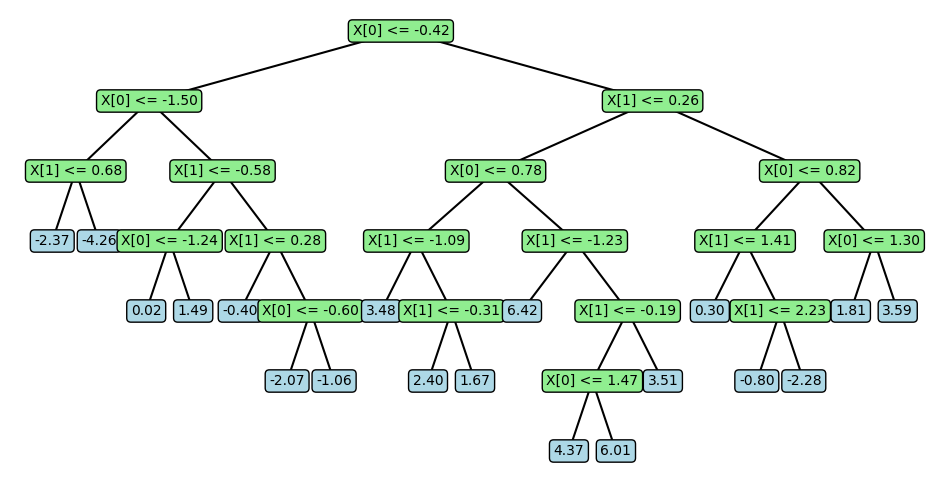

In [40]:
# prune to see only few first top level nodes
model_reg2.prune(alpha=5)
plot_reg_tree_matplotlib(model_reg2.tree)

#### Search best hyperparam options

In [28]:
def get_result_for_params(md, mss, msl):
    model = DecisionTreeRegression(
        max_depth=md,
        min_samples_split=mss,
        min_samples_leaf=msl,
    )
    model.fit(X_reg2_train, y_reg2_train)

    y_pred_train = model.predict(X_reg2_train)
    y_pred_test = model.predict(X_reg2_test)

    
    rmse_train = rmse(y_reg2_train, y_pred_train)
    rmse_test = rmse(y_reg2_test, y_pred_test)

    return {
        'Max Depth': md,
        'Min Samples Split': mss,
        'Min Samples Leaf': msl,
        'Training RMSE': rmse_train,
        'Test RMSE': rmse_test
    }

In [29]:
%%time
import pandas as pd

errors_df = pd.DataFrame([get_result_for_params(md, mss, msl) for md in range(1, 10) for mss in range(1, 10) for msl in range(1, 10)])

CPU times: user 2.57 s, sys: 20.8 ms, total: 2.59 s
Wall time: 2.68 s


In [30]:
errors_df.sort_values("Test RMSE", ascending=True).head(20)

,Max Depth,Min Samples Split,Min Samples Leaf,Training RMSE,Test RMSE
559,7,9,2,0.464307,0.832852
694,9,6,2,0.341946,0.840029
513,7,4,1,0.339145,0.841163
486,7,1,1,0.301940,0.841253
495,7,2,1,0.301940,0.841253
523,7,5,2,0.375293,0.841467
685,9,5,2,0.315014,0.841510
432,6,4,1,0.432073,0.843049
721,9,9,2,0.445070,0.843090
541,7,7,2,0.390184,0.844004


##### Visualizations

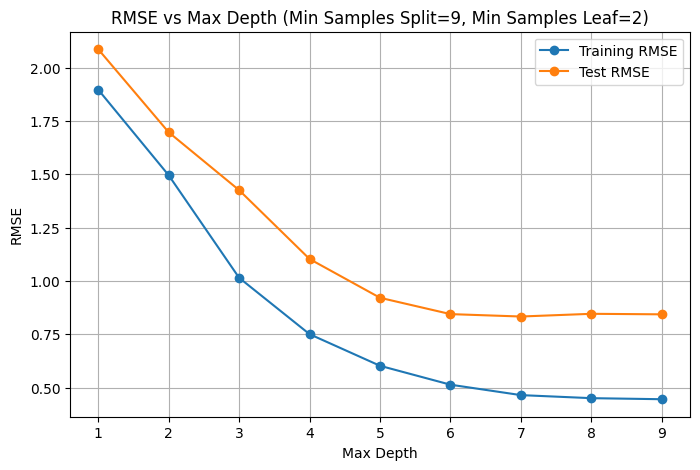

In [31]:
# Filter the dataframe for the fixed parameters
df_plot = errors_df[
    (errors_df['Min Samples Split'] == 9) &
    (errors_df['Min Samples Leaf'] == 2)
]

# Sort by Max Depth to make plot line smooth
df_plot = df_plot.sort_values('Max Depth')

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df_plot['Max Depth'], df_plot['Training RMSE'], marker='o', label='Training RMSE')
plt.plot(df_plot['Max Depth'], df_plot['Test RMSE'], marker='o', label='Test RMSE')

plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('RMSE vs Max Depth (Min Samples Split=9, Min Samples Leaf=2)')
plt.legend()
plt.grid(True)
plt.show()


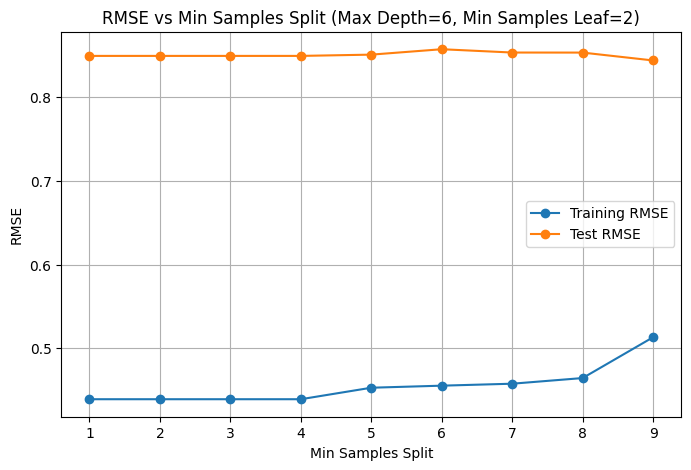

In [32]:
# Filter the dataframe for fixed parameters
df_plot = errors_df[
    (errors_df['Max Depth'] == 6) &
    (errors_df['Min Samples Leaf'] == 2)
]

# Sort by Min Samples Split for smooth curves
df_plot = df_plot.sort_values('Min Samples Split')

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df_plot['Min Samples Split'], df_plot['Training RMSE'], marker='o', label='Training RMSE')
plt.plot(df_plot['Min Samples Split'], df_plot['Test RMSE'], marker='o', label='Test RMSE')

plt.xlabel('Min Samples Split')
plt.ylabel('RMSE')
plt.title('RMSE vs Min Samples Split (Max Depth=6, Min Samples Leaf=2)')
plt.legend()
plt.grid(True)
plt.show()


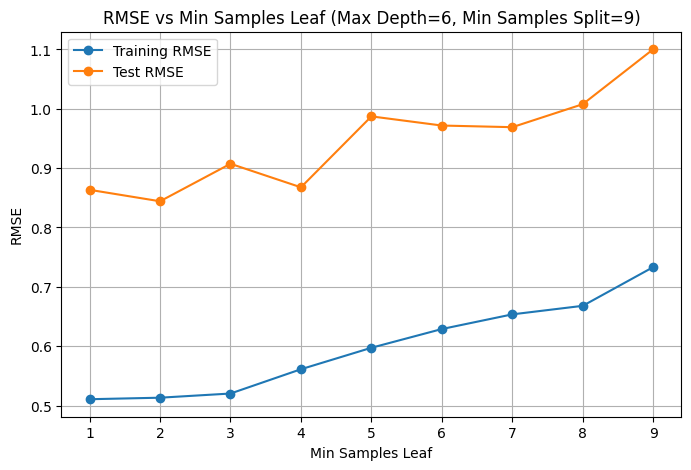

In [33]:
# Filter the dataframe for fixed parameters
df_plot_leaf = errors_df[
    (errors_df['Max Depth'] == 6) &
    (errors_df['Min Samples Split'] == 9)
]

# Sort by Min Samples Leaf for smooth curves
df_plot_leaf = df_plot_leaf.sort_values('Min Samples Leaf')

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df_plot_leaf['Min Samples Leaf'], df_plot_leaf['Training RMSE'], marker='o', label='Training RMSE')
plt.plot(df_plot_leaf['Min Samples Leaf'], df_plot_leaf['Test RMSE'], marker='o', label='Test RMSE')

plt.xlabel('Min Samples Leaf')
plt.ylabel('RMSE')
plt.title('RMSE vs Min Samples Leaf (Max Depth=6, Min Samples Split=9)')
plt.legend()
plt.grid(True)
plt.show()
